# SQlite3 Tutorial

Needed to download a DB Browser for SQLite to view the database.  Found this by googling it and going to the github result.  Then downloaded the one for  my operating system.  


# Creating a database with SQlite3

Inserting records.  


In [21]:
import sqlite3

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)')
    
def data_entry():
    c.execute("INSERT INTO stuffToPlot VALUES(1234743323, '2016-02-01', 'Python', 5)")
    conn.commit()
    c.close()
    conn.close()
    
#create_table()    #call to create the table; no need to re-run but if you do it won't error because of the IF NOT EXISTS command
#data_entry()      #call to input a row of data
data_entry()  #call to input another row of data (changed what was originally above in the function but here the rows are manually being input one at a time)

# Inserting variables to a database table.



In [23]:
import sqlite3
import time
import datetime
import random

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

def dynamic_data_entry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))  #4 digit year, 2 digit month and day, hours, minutes, seconds 
    keyword = 'Python'
    value = random.randrange(0,10)
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
             (unix, date, keyword, value))
    conn.commit()
    
for i in range(10):
    dynamic_data_entry()
    time.sleep(1)      #only doing this since we are populating the timestamp and we want them to be different; this will increment it by one second

c.close()
conn.close()    
    

# How to read from an SQlite database

In [24]:
import sqlite3
import time
import datetime
import random

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()
    
def read_from_db():
    c.execute('SELECT * FROM stuffToPlot')   #Choose everything from the database - but nothing happens yet
    data = c.fetchall()
    print(data)
    
read_from_db()
c.close()
conn.close()    
    

[(1541836507.427284, '2018-11-10 02:55:07', 'Python', 7.0), (1541836616.642457, '2018-11-10 02:56:56', 'Python', 9.0), (1541836617.6677616, '2018-11-10 02:56:57', 'Python', 9.0), (1541836618.685028, '2018-11-10 02:56:58', 'Python', 5.0), (1541836619.6996024, '2018-11-10 02:56:59', 'Python', 9.0), (1541836620.7171772, '2018-11-10 02:57:00', 'Python', 3.0), (1541836621.734784, '2018-11-10 02:57:01', 'Python', 4.0), (1541836622.7515607, '2018-11-10 02:57:02', 'Python', 4.0), (1541836623.7682765, '2018-11-10 02:57:03', 'Python', 5.0), (1541836624.7837703, '2018-11-10 02:57:04', 'Python', 5.0), (1541836625.797121, '2018-11-10 02:57:05', 'Python', 4.0), (1541882384.1540525, '2018-11-10 15:39:44', 'Python', 1.0), (1541882385.1971858, '2018-11-10 15:39:45', 'Python', 6.0), (1541882386.213437, '2018-11-10 15:39:46', 'Python', 3.0), (1541882387.2339053, '2018-11-10 15:39:47', 'Python', 6.0), (1541882388.2498193, '2018-11-10 15:39:48', 'Python', 5.0), (1541882389.2647538, '2018-11-10 15:39:49', '

# Now to interate through the data 

In [25]:
import sqlite3
import time
import datetime
import random

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

def read_from_db():
    c.execute("SELECT keyword, unix, value FROM stuffToPlot WHERE value=3 AND keyword='Python'")   #Choose everything from the database with a * or can list columns in order you want to see them
    for row in  c.fetchall():
        print(row)

read_from_db()
c.close()
conn.close()    
    

('Python', 1541836620.7171772, 3.0)
('Python', 1541882386.213437, 3.0)
('Python', 1541882391.3106577, 3.0)
('Python', 1541882392.332057, 3.0)
('Python', 1541882403.6558561, 3.0)
('Python', 1541882464.899924, 3.0)
('Python', 1541882684.3990626, 3.0)
('Python', 1541882685.4131944, 3.0)
('Python', 1541882883.6205244, 3.0)
('Python', 1541883181.501164, 3.0)
('Python', 1541883186.6020396, 3.0)


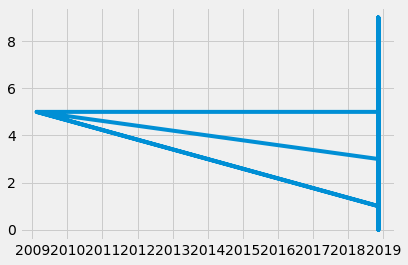

In [26]:
import sqlite3
import time
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

def graph_data():
    c.execute('SELECT unix, value FROM stuffToPlot')
    dates = []
    values = []
    for row in c.fetchall():
#        print(row[0])
#        print(datetime.datetime.fromtimestamp(row[0]))
        dates.append(datetime.datetime.fromtimestamp(row[0]))
        values.append(row[1])
  
    plt.plot_date(dates, values, '-')
    plt.show()

graph_data()
c.close()
conn.close()    
    

# Change data and delete data in database

There are NO undo's.  Make sure you've got automatic back ups happening with databases!


In [44]:
import sqlite3
import time
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

conn = sqlite3.connect('tutorial.db')
c = conn.cursor()

def del_and_update():  
    c.execute('SELECT * FROM stuffToPlot')
    [print(row) for row in c.fetchall()]   #This just selects the rows
    
#   c.execute('UPDATE stuffToPlot SET value = 99 WHERE value = 8')   #this will change the value to a 99 where the value is and 8
#   conn.commit()

#    c.execute('SELECT * FROM stuffToPlot')
#    [print(row) for row in c.fetchall()]   #This just selects the rows
    
#    c.execute('DELETE FROM stuffToPlot WHERE value = 99')   #this will delete all where the value is 99
#    conn.commit()
#    print(50*'#')
#    c.execute('SELECT * FROM stuffToPlot')
#    [print(row) for row in c.fetchall()]

    print(50*'#')

    c.execute('SELECT * FROM stuffToPlot WHERE value = 2')   #so do this first to see how many records you will be updating/deleting
    [print(row) for row in c.fetchall()]
    print(50*'#')

    c.execute('SELECT * FROM stuffToPlot WHERE value = 2')  # this will display the number of records so you have a size
    print(len(c.fetchall()))

del_and_update()
c.close()
conn.close()    
    

(1541836507.427284, '2018-11-10 02:55:07', 'Python', 7.0)
(1541836616.642457, '2018-11-10 02:56:56', 'Python', 9.0)
(1541836617.6677616, '2018-11-10 02:56:57', 'Python', 9.0)
(1541836618.685028, '2018-11-10 02:56:58', 'Python', 5.0)
(1541836619.6996024, '2018-11-10 02:56:59', 'Python', 9.0)
(1541836620.7171772, '2018-11-10 02:57:00', 'Python', 3.0)
(1541836621.734784, '2018-11-10 02:57:01', 'Python', 4.0)
(1541836622.7515607, '2018-11-10 02:57:02', 'Python', 4.0)
(1541836623.7682765, '2018-11-10 02:57:03', 'Python', 5.0)
(1541836624.7837703, '2018-11-10 02:57:04', 'Python', 5.0)
(1541836625.797121, '2018-11-10 02:57:05', 'Python', 4.0)
(1541882384.1540525, '2018-11-10 15:39:44', 'Python', 1.0)
(1541882385.1971858, '2018-11-10 15:39:45', 'Python', 6.0)
(1541882386.213437, '2018-11-10 15:39:46', 'Python', 3.0)
(1541882387.2339053, '2018-11-10 15:39:47', 'Python', 6.0)
(1541882388.2498193, '2018-11-10 15:39:48', 'Python', 5.0)
(1541882389.2647538, '2018-11-10 15:39:49', 'Python', 7.0)
(15

# This is courtesy of the tutorials from pythonprogramming.net